# Interface with Geopsy-gpdc

In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt

from nessi.modeling.interfaces import dispersion_curve_init
from nessi.modeling.interfaces import dispersion_curve_rayleigh
from nessi.modeling.interfaces import dispersion_curve_love

In [2]:
# Define the model
nLayers = 3
h = np.zeros(nLayers, dtype=np.float64)
vp = np.zeros(nLayers, dtype=np.float64)
vs = np.zeros(nLayers, dtype=np.float64)
rho = np.zeros(nLayers, dtype=np.float64)

h[0] = 7.5
h[1] = 25.0
vp[0] = 500.0
vp[1] = 1350.0
vp[2] = 2000.0
vs[0] = 200.0
vs[1] = 210.0
vs[2] = 1000.0
rho[0] = 1800.0
rho[1] = 1900.0
rho[2] = 2500.0

In [3]:
# Frequency sample
nSamples = 51
omega = np.linspace(10., 50., 51)
omega *= 2.*np.pi

In [4]:
nModes = 1
group = 0

slownessR = np.zeros((nSamples*nModes), dtype=np.float64)
slownessL = np.zeros((nSamples*nModes), dtype=np.float64)

In [5]:
# Initialize
dispersion_curve_init(0)

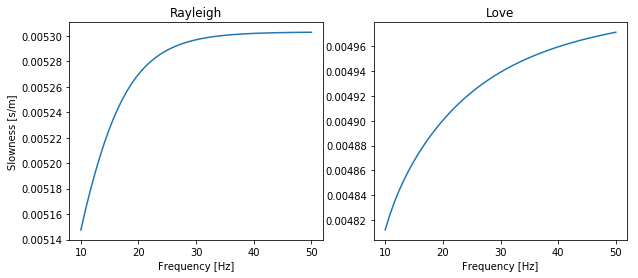

In [8]:
# Calculate theoretical Rayleigh dispersion curve
dispersion_curve_rayleigh(nLayers, h, vp, vs, rho, nSamples, omega, nModes, slownessR, group)
dispersion_curve_love(nLayers, h, vp, vs, rho, nSamples, omega, nModes, slownessL, group)

fig = plt.figure(figsize=(10,4))
plt.subplot(121)
plt.xlabel(r'Frequency [Hz]')
plt.ylabel(r'Slowness [s/m]')
plt.title(r'Rayleigh')
plt.plot(omega/(2.*np.pi), slownessR)
plt.subplot(122)
plt.xlabel(r'Frequency [Hz]')
plt.title(r'Love')
plt.plot(omega/(2.*np.pi), slownessL);